In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.20.0
Num GPUs Available: 0


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load transfermarkt market values
transfer_file = "transfermarkt_market_values.csv"
transfer_df = pd.read_csv(transfer_file)

print("Columns:", transfer_df.columns.tolist())
print(transfer_df.head())


Columns: ['Name', 'Age', 'Nationality', 'Club', 'Market Value']
   Name                Age  Nationality    Club  Market Value
0   NaN   Alessandro Riggi          NaN  Canada            31
1   NaN  Christian Pastina          NaN   Italy            24
2   NaN    Abdullo Dzhebov          NaN  Russia            21
3   NaN   Daniil Stolyarov          NaN  Russia            22
4   NaN       Semen Fadeev          NaN  Russia            20


In [3]:
transfer_df = pd.read_csv("transfermarkt_market_values.csv", sep=",", engine="python", on_bad_lines="skip")

print("Shape:", transfer_df.shape)
print("Columns:", transfer_df.columns.tolist())
print(transfer_df.head(10))


Shape: (25, 5)
Columns: ['Name', 'Age', 'Nationality', 'Club', 'Market Value']
   Name                 Age  Nationality            Club  Market Value
0   NaN    Alessandro Riggi          NaN          Canada            31
1   NaN   Christian Pastina          NaN           Italy            24
2   NaN     Abdullo Dzhebov          NaN          Russia            21
3   NaN    Daniil Stolyarov          NaN          Russia            22
4   NaN        Semen Fadeev          NaN          Russia            20
5   NaN         Ilya Tuseev          NaN          Russia            23
6   NaN  Yaroslav Grebenkin          NaN          Russia            22
7   NaN     Nikita Gloydman          NaN          Russia            23
8   NaN         Jakub Pesek          NaN  Czech Republic            32
9   NaN     Daniel Sandoval          NaN           Spain            27


In [4]:
print(transfer_df.sample(5))
print(transfer_df.columns)


    Name                 Age  Nationality            Club  Market Value
5    NaN         Ilya Tuseev          NaN          Russia            23
23   NaN         Nader Matar          NaN         Lebanon            33
24   NaN  Ali Al-Rida Ismail          NaN         Lebanon            22
8    NaN         Jakub Pesek          NaN  Czech Republic            32
9    NaN     Daniel Sandoval          NaN           Spain            27
Index(['Name', 'Age', 'Nationality', 'Club', 'Market Value'], dtype='object')


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Load the consolidated dataset
df = pd.read_csv(r'C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_all_imputed.csv')

# Display the first few rows and information
print("DataFrame Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               1148 non-null   object 
 1   passes_attempted     1148 non-null   float64
 2   expected_goals       1148 non-null   float64
 3   goals                1148 non-null   float64
 4   assists              1148 non-null   float64
 5   injury_count         1148 non-null   float64
 6   total_days_out       1148 non-null   float64
 7   days_per_injury      1148 non-null   float64
 8   avg_market_value     1148 non-null   float64
 9   market_missing_flag  1148 non-null   float64
dtypes: float64(9), object(1)
memory usage: 89.8+ KB

First 5 rows:
              player  passes_attempted  expected_goals     goals  assists  \
0    aaron boupendza         -0.144749        -0.14486 -0.051187      0.0   
1       aaron hickey         -0.144749        -0.14486 

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Define your features and target variable
# The target variable for time series is typically a future value of a feature, e.g., 'avg_market_value'
features = ['passes_attempted', 'expected_goals', 'goals', 'assists', 'injury_count', 'total_days_out', 'avg_market_value']
target = 'avg_market_value'

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

print("\nScaled data shape:", scaled_data.shape)


Scaled data shape: (1148, 7)


In [6]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, -1] # The last column is the target (market value)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the number of time steps (this is a hyperparameter you can tune)
n_steps = 3

# Create sequences
X, y = create_sequences(scaled_data, n_steps)

print(f"\nShape of X (samples, timesteps, features): {X.shape}")
print(f"Shape of y (samples, output): {y.shape}")


Shape of X (samples, timesteps, features): (1145, 3, 7)
Shape of y (samples, output): (1145,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1)) # Output layer for a single value prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()


Model Summary:


c:\Users\M.ANTONY ROJES\Downloads\Infosys\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,651 (45.51 KB)

 Trainable params: 11,651 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
# You can split your data into training and validation sets here to monitor loss
# e.g., train on 80% and validate on 20%
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

history = model.fit(
    X_train,
    y_train,
    epochs=50, # You can adjust this
    validation_data=(X_val, y_val),
    verbose=1
)

# You can save the model weights after training
# model.save('lstm_model.h5')

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0173 - val_loss: 0.0118
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0117
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - val_loss: 0.0117
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - val_loss: 0.0117
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - val_loss: 0.0117
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - val_loss: 0.0117
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - val_loss: 0.0118
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - val_loss: 0.0117
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - val_l

✅ Loss curve saved as 'model_loss.png'
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Root Mean Squared Error (RMSE) on Validation Set: 0.1092


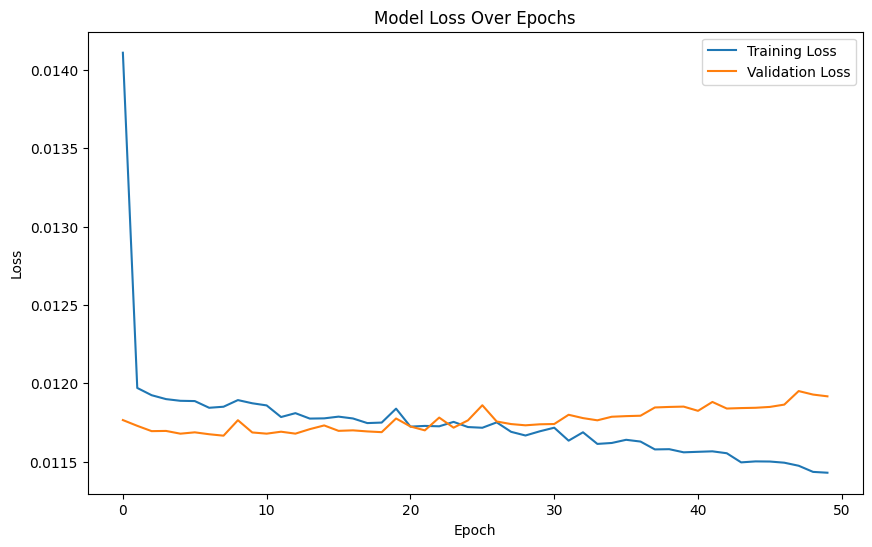

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('model_loss.png')
print("✅ Loss curve saved as 'model_loss.png'")

# Make predictions on the validation set
y_pred_scaled = model.predict(X_val)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_scaled))
print(f"\nRoot Mean Squared Error (RMSE) on Validation Set: {rmse:.4f}")

In [10]:
features = ['avg_market_value']
target = 'avg_market_value'


In [11]:
from tensorflow.keras.layers import RepeatVector, TimeDistributed

model_encdec = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])),
    RepeatVector(3),  # predict 3 future steps
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model_encdec.compile(optimizer='adam', loss='mse')
model_encdec.summary()


c:\Users\M.ANTONY ROJES\Downloads\Infosys\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 3, 1)           │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

model_encdec = Sequential([
    Input(shape=(n_steps, X.shape[2])),
    LSTM(50, activation='relu'),
    RepeatVector(3),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])


In [13]:
# --- SAVE WEEK 5 MODELS & RESULTS ---

# Save trained LSTM model
model.save("week5_lstm_model.h5")
print("✅ LSTM model saved as week5_lstm_model.h5")

# Save training history (loss curves)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.to_csv("week5_training_history.csv", index=False)
print("✅ Training history saved as week5_training_history.csv")

# Save RMSE result
with open("week5_results.txt", "w") as f:
    f.write(f"Week 5 LSTM RMSE (Validation Set): {rmse:.4f}\n")
print("✅ RMSE saved as week5_results.txt")


✅ LSTM model saved as week5_lstm_model.h5
✅ Training history saved as week5_training_history.csv
✅ RMSE saved as week5_results.txt
